### Vegetable Images Classfication_LeNet-5_version_1


### 0. 패키지 및 데이터 불러오기

+ 이미지를 /225로 정규화    
+ LeNet-5의 input 사이즈에 맞춰 이미지를 32 * 32로 조정

In [1]:
!pip install keras
!pip install tensorflow
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
BASE_DIR ='Vegetable Images/'

In [4]:
#/225로 정규화 처리 후 이미지 불러오기
train_datagen = ImageDataGenerator(rescale=1./255) 

#LeNet-5 이미지 사이즈에 맞춰 32*32로 이미지 불러오기
train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + 'train', target_size=(32,32), seed=42, class_mode='categorical') 

Found 15000 images belonging to 15 classes.


(32, 32, 3)


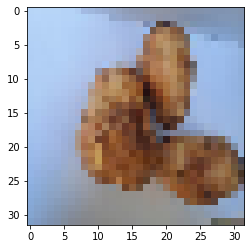

In [5]:
x_train, y_train = train_datagen_flow.next()

print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()

In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + 'validation', target_size=(32,32),seed=42, class_mode='categorical')

Found 3000 images belonging to 15 classes.


(32, 32, 3)


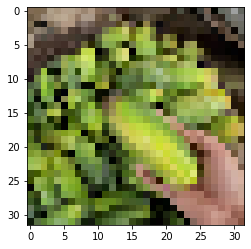

In [7]:
x_valid,y_valid = valid_datagen_flow.next()

print(x_valid[0].shape)
plt.imshow(x_valid[0])
plt.show()

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen_flow = test_datagen.flow_from_directory(BASE_DIR + 'test', target_size=(32,32),seed=42, class_mode='categorical')

Found 3000 images belonging to 15 classes.


(32, 32, 3)


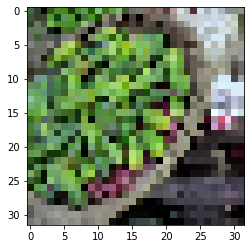

In [9]:
x_test,y_test = test_datagen_flow.next()

print(x_test[0].shape)
plt.imshow(x_test[0])
plt.show()

### 2. LeNet-5 모델링

+ train, test 의 사이즈 확인
+ LeNet-5 모델링

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (32, 32, 32, 3)
32 train samples
32 test samples
(32, 32, 3) image shape


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
input_shape = x_train[0].shape

In [13]:
#LeNet-5 modeling

model = keras.models.Sequential([
  keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
  keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
  keras.layers.Conv2D(120,kernel_size=(5, 5), strides = (1,1), activation = 'tanh', padding='valid'),
  keras.layers.Flatten(),
  keras.layers.Dense(120, activation='tanh'),
  keras.layers.Dense(84, activation='tanh'),
  keras.layers.Dense(15, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               5

In [15]:
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

### 3. 모델 적용 및 결과

+ 모델 적용
+ history 그래프 시각화
+ test 적용 평가

In [16]:
history = model.fit(x_train, y=y_train, 
          epochs=50, 
          batch_size = 32,
          validation_data=(x_valid, y_valid), 
          verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 511ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 6/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0622 - accuracy: 0.0312 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0622 - accuracy: 0.0625 - val_loss: 0.0622 - val_accuracy: 0.0938
Epoch 8/50
1/1 [==========

In [17]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

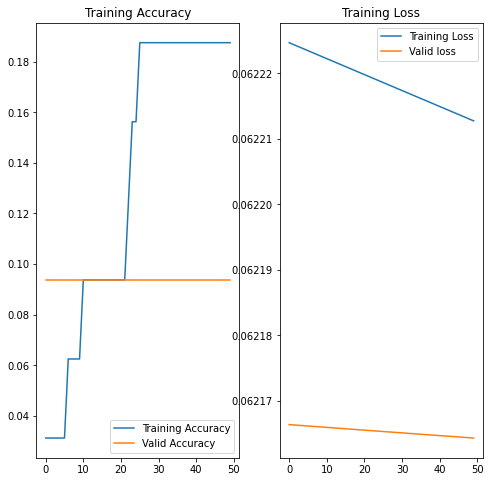

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Valid Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Valid loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [19]:
test_score = model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.0622 - accuracy: 0.0938


In [20]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 0.0622, accuracy 9.38%


## 결론

+ LeNet-5를 이용한 채소 이미지 분류는 정확도 9.38%로 굉장히 낮은 결과를 보인다
+ 32 * 32의 낮은 픽셀을 사용한 영향이 큰 것으로 추정된다.